<a href="https://colab.research.google.com/github/yashraj02/Data-Science-Projects/blob/master/Iris_Flowers_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('/content/drive/My Drive/Data Science/ML Projects/Iris Flowers Classification Project/Iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


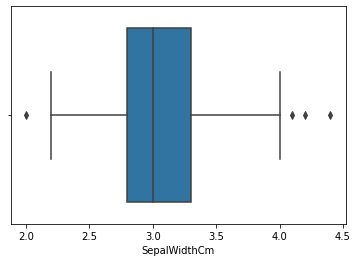

In [10]:
import seaborn as sns
sns.boxplot(x=dataset['SepalWidthCm'])

In [11]:
q25, q75 = np.percentile(dataset['SepalWidthCm'], 25), np.percentile(dataset['SepalWidthCm'], 75)
sepalWidthCm_iqr = q75 - q25

cut_off = sepalWidthCm_iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print(lower,upper)

outliers = [x for x in dataset['SepalWidthCm'] if x < lower or x > upper]
dataset2 = dataset.drop(dataset[(dataset['SepalWidthCm'] > upper) | (dataset['SepalWidthCm'] < lower)].index)
dataset2

2.05 4.05


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [0]:
dataset2.set_index('Id',inplace=True)

In [13]:
dataset2['Species'].unique()
species = {'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}
dataset2['Species'] = dataset2['Species'].map(species)
dataset2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,3
147,6.3,2.5,5.0,1.9,3
148,6.5,3.0,5.2,2.0,3


In [0]:
 from sklearn.preprocessing import StandardScaler
 std_scaler = StandardScaler()
 dataset2['SepalLengthCm'] = std_scaler.fit_transform(dataset2[['SepalLengthCm']])
 dataset2['SepalWidthCm'] = std_scaler.fit_transform(dataset2[['SepalWidthCm']])
 dataset2['PetalLengthCm'] = std_scaler.fit_transform(dataset2[['PetalLengthCm']])
 dataset2['PetalWidthCm'] = std_scaler.fit_transform(dataset2[['PetalWidthCm']])

In [15]:
dataset2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,-0.910515,1.175789,-1.374878,-1.345899,1
2,-1.151122,-0.093924,-1.374878,-1.345899,1
3,-1.391729,0.413961,-1.431986,-1.345899,1
4,-1.512032,0.160019,-1.317771,-1.345899,1
5,-1.030819,1.429732,-1.374878,-1.345899,1
...,...,...,...,...,...
146,1.014339,-0.093924,0.795200,1.425441,3
147,0.533125,-1.363637,0.680985,0.897567,3
148,0.773732,-0.093924,0.795200,1.029536,3


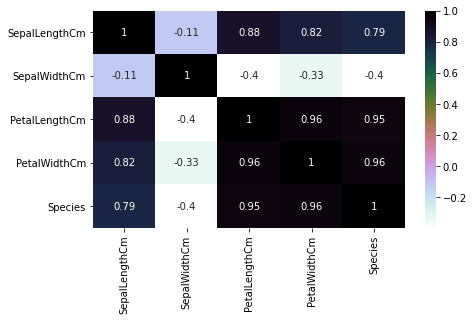

In [20]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,4)) 
sns.heatmap(dataset2.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

The heatmap is clearly showing that Petal features have higher correlatioin as compared to sepal. Hence we will use this in later half of our prediction to increase accuracy.

In [0]:
X = dataset2.drop('Species', axis=1)
y = dataset2['Species']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9591836734693877


In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9795918367346939


In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf = SVC().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9795918367346939


In [49]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9387755102040817


In [51]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9591836734693877


In [53]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9795918367346939
